In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

In [2]:
# Import data from the colvar files
data_hills0 = plumed.read_as_pandas("hills/HILLS.0")
data_hills1 = plumed.read_as_pandas("hills/HILLS.1")
data_hills2 = plumed.read_as_pandas("hills/HILLS.2")
data_hills3 = plumed.read_as_pandas("hills/HILLS.3")
data_hills4 = plumed.read_as_pandas("hills/HILLS.4")
data_hills5 = plumed.read_as_pandas("hills/HILLS.5")
data_hills6 = plumed.read_as_pandas("hills/HILLS.6")
data_hills7 = plumed.read_as_pandas("hills/HILLS.7")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2672/1392044568.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills0 = plumed.read_as_pandas("hills/HILLS.0")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2672/1392044568.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills1 = plumed.read_as_pandas("hills/HILLS.1")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2672/1392044568.py:4: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills2 = plumed.read_as_pandas("hills/HILLS.2")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2672/1392044568.py:5: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills3 = plumed.read_as_pandas("hills/HILLS.3")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2672/1392044568.py:6: UserWarning: cannot load PLUMED instance, conversions will not be avail

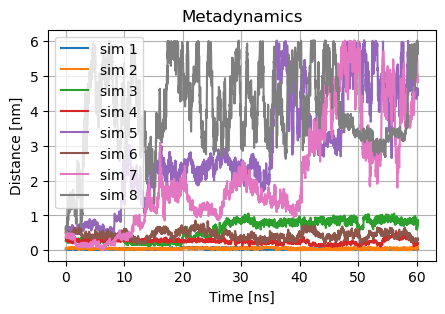

In [3]:
plt.rcParams["figure.figsize"] = (5, 3)
plt.plot(data_hills0["time"]*0.001, data_hills0["d1"], label="sim 1")
plt.plot(data_hills1["time"]*0.001, data_hills1["d1"], label="sim 2")
plt.plot(data_hills2["time"]*0.001, data_hills2["d1"], label="sim 3")
plt.plot(data_hills3["time"]*0.001, data_hills3["d1"], label="sim 4")
plt.plot(data_hills4["time"]*0.001, data_hills4["d1"], label="sim 5")
plt.plot(data_hills5["time"]*0.001, data_hills5["d1"], label="sim 6")
plt.plot(data_hills6["time"]*0.001, data_hills6["d1"], label="sim 7")
plt.plot(data_hills7["time"]*0.001, data_hills7["d1"], label="sim 8")
plt.grid()
plt.title("Metadynamics")
plt.ylabel("Distance [nm]")
plt.xlabel("Time [ns]")
plt.legend(loc="best")

# Reconstruct the free energy profile

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2672/3113428609.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes = plumed.read_as_pandas("hills/fes.dat")


Text(0, 0.5, 'Free energy [kJ/mol]')

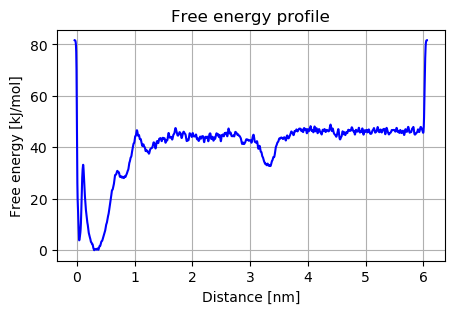

In [4]:
fes = plumed.read_as_pandas("hills/fes.dat")
plt.plot(fes["d1"], fes["file.free"], 'b')
plt.grid()
plt.title("Free energy profile")
plt.xlabel("Distance [nm]")
plt.ylabel("Free energy [kJ/mol]")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_2672/2017961808.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes = plumed.read_as_pandas("hills/fes.dat")


Text(0, 0.5, 'Free energy [kJ/mol]')

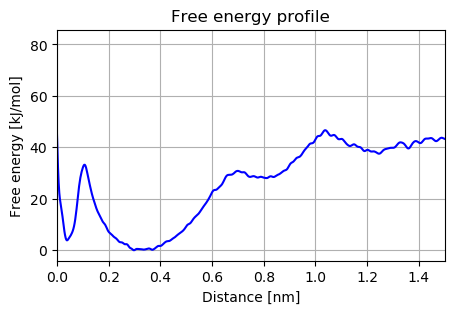

In [5]:
fes = plumed.read_as_pandas("hills/fes.dat")
plt.plot(fes["d1"], fes["file.free"], 'b')
plt.xlim([0, 1.5])
plt.grid()
plt.title("Free energy profile")
plt.xlabel("Distance [nm]")
plt.ylabel("Free energy [kJ/mol]")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3678/741290764.py:7: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("hills/FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3678/741290764.py:7: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("hills/FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3678/741290764.py:7: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("hills/FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3678/741290764.py:7: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("hills/FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3678/741290764.py:7: UserWarning: cannot load PLUMED instance, conversion

Text(0, 0.5, 'Free energies [kJ/mol]')

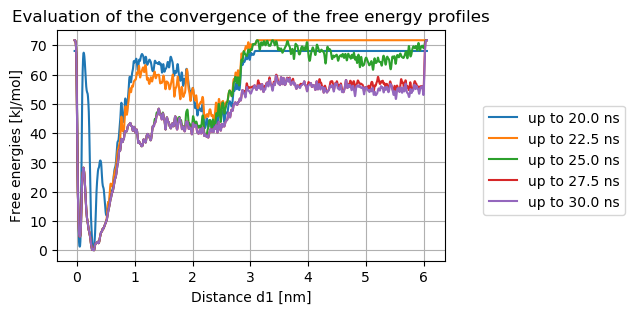

In [10]:
stride = 1000



for i in range(8, 13):   
    # import fes file into pandas dataset
    data=plumed.read_as_pandas("hills/FES/fes_"+str(i)+".dat")
    plt.plot(data["d1"],data["file.free"], label="up to "+str(i * stride/1000 * 30/12)+" ns")

plt.grid()
plt.title("Evaluation of the convergence of the free energy profiles")
plt.legend(loc=(1.1, 0.2))
plt.xlabel("Distance d1 [nm]")
plt.ylabel("Free energies [kJ/mol]")